<a href="https://www.kaggle.com/code/suneelkumarpatel/world-happiness-data-exploration?scriptVersionId=138287344" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">Setup</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("/kaggle/input/world-happiness-2016/world_happiness_2016.csv")

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">Data profile</div>

In [3]:
import pandas_profiling
df.profile_report()

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_20/2139266725.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### No missing values present

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">Categorical variables exploration</div>

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">Exploration of categorical variables by region</div>

## Happiness Score

<Axes: ylabel='Region'>

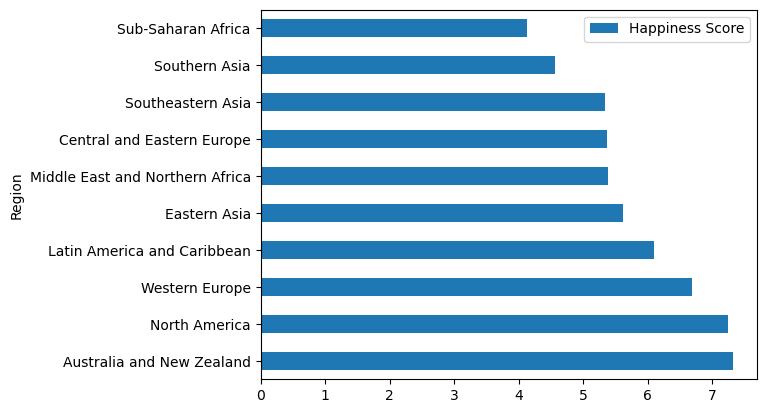

In [4]:
df_continent = df[["Region", "Happiness Score"]].groupby("Region").mean().sort_values(by="Happiness Score", ascending=False)
df_continent.plot(kind='barh')

In [5]:
fig = px.box(df, x="Region", y="Happiness Score", color="Region")
fig.show()

## GDP per Capita

<Axes: ylabel='Region'>

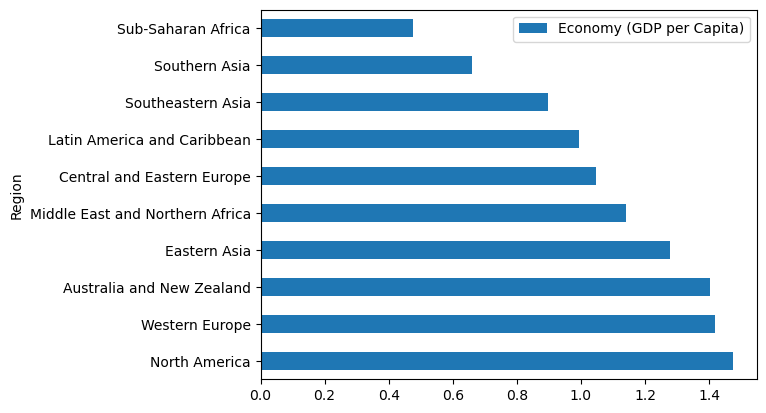

In [6]:
df_continent = df[["Region", "Economy (GDP per Capita)"]].groupby("Region").mean().sort_values(by="Economy (GDP per Capita)", ascending=False)
df_continent.plot(kind='barh')

In [7]:
fig = px.box(df, x="Region", y="Economy (GDP per Capita)", color="Region")
fig.show()

## Health

<Axes: ylabel='Region'>

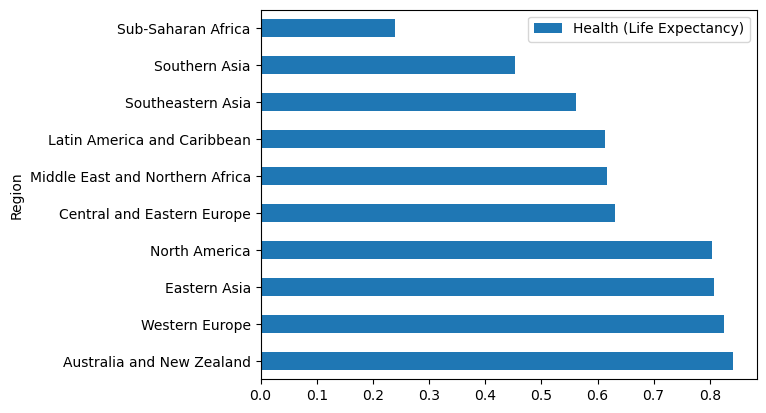

In [8]:
df_continent = df[["Region", "Health (Life Expectancy)"]].groupby("Region").mean().sort_values(by="Health (Life Expectancy)", ascending=False)
df_continent.plot(kind='barh')

In [9]:
fig = px.box(df, x="Region", y="Health (Life Expectancy)", color="Region")
fig.show()

## Freedom

<Axes: ylabel='Region'>

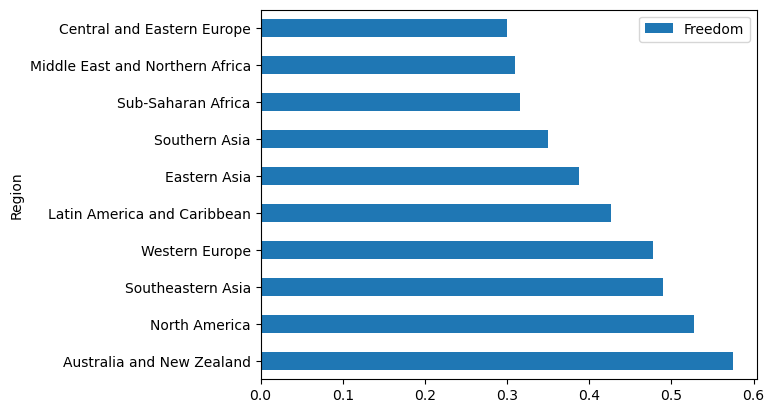

In [10]:
df_continent = df[["Region", "Freedom"]].groupby("Region").mean().sort_values(by="Freedom", ascending=False)
df_continent.plot(kind='barh')

In [11]:
fig = px.box(df, x="Region", y="Freedom", color="Region")
fig.show()

<Axes: ylabel='Region'>

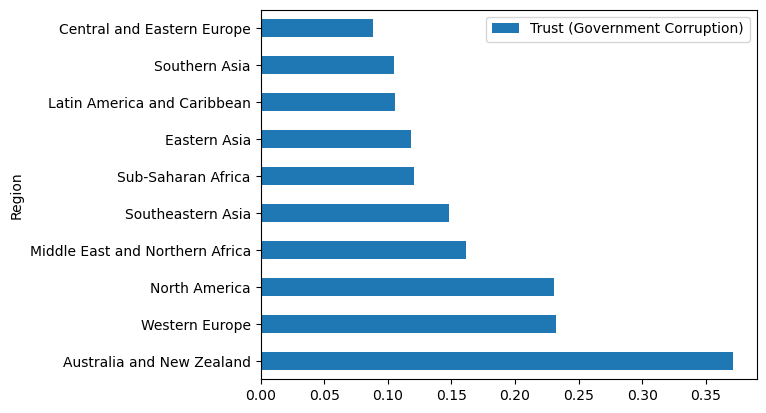

In [12]:
df_continent = df[["Region", "Trust (Government Corruption)"]].groupby("Region").mean().sort_values(by="Trust (Government Corruption)", ascending=False)
df_continent.plot(kind='barh')

In [13]:
fig = px.box(df, x="Region", y="Trust (Government Corruption)", color="Region")
fig.show()

## Generosity

<Axes: ylabel='Region'>

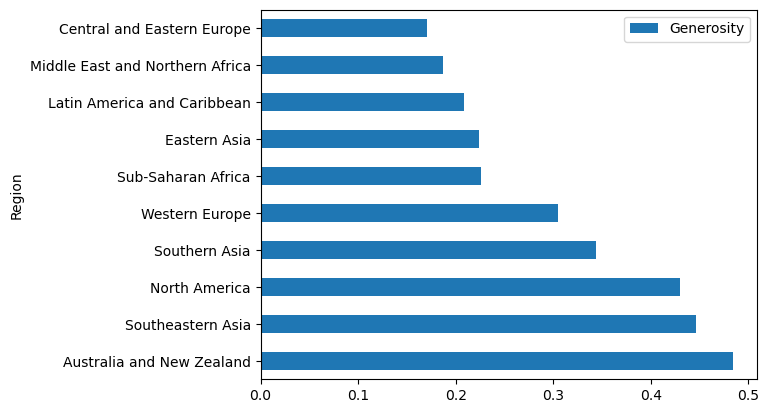

In [14]:
df_continent = df[["Region", "Generosity"]].groupby("Region").mean().sort_values(by="Generosity", ascending=False)

df_continent.plot(kind='barh')

In [15]:
fig = px.box(df, x="Region", y="Generosity", color="Region")
fig.show()

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">Top 10 & bottom 10 countries of categorical variables</div>

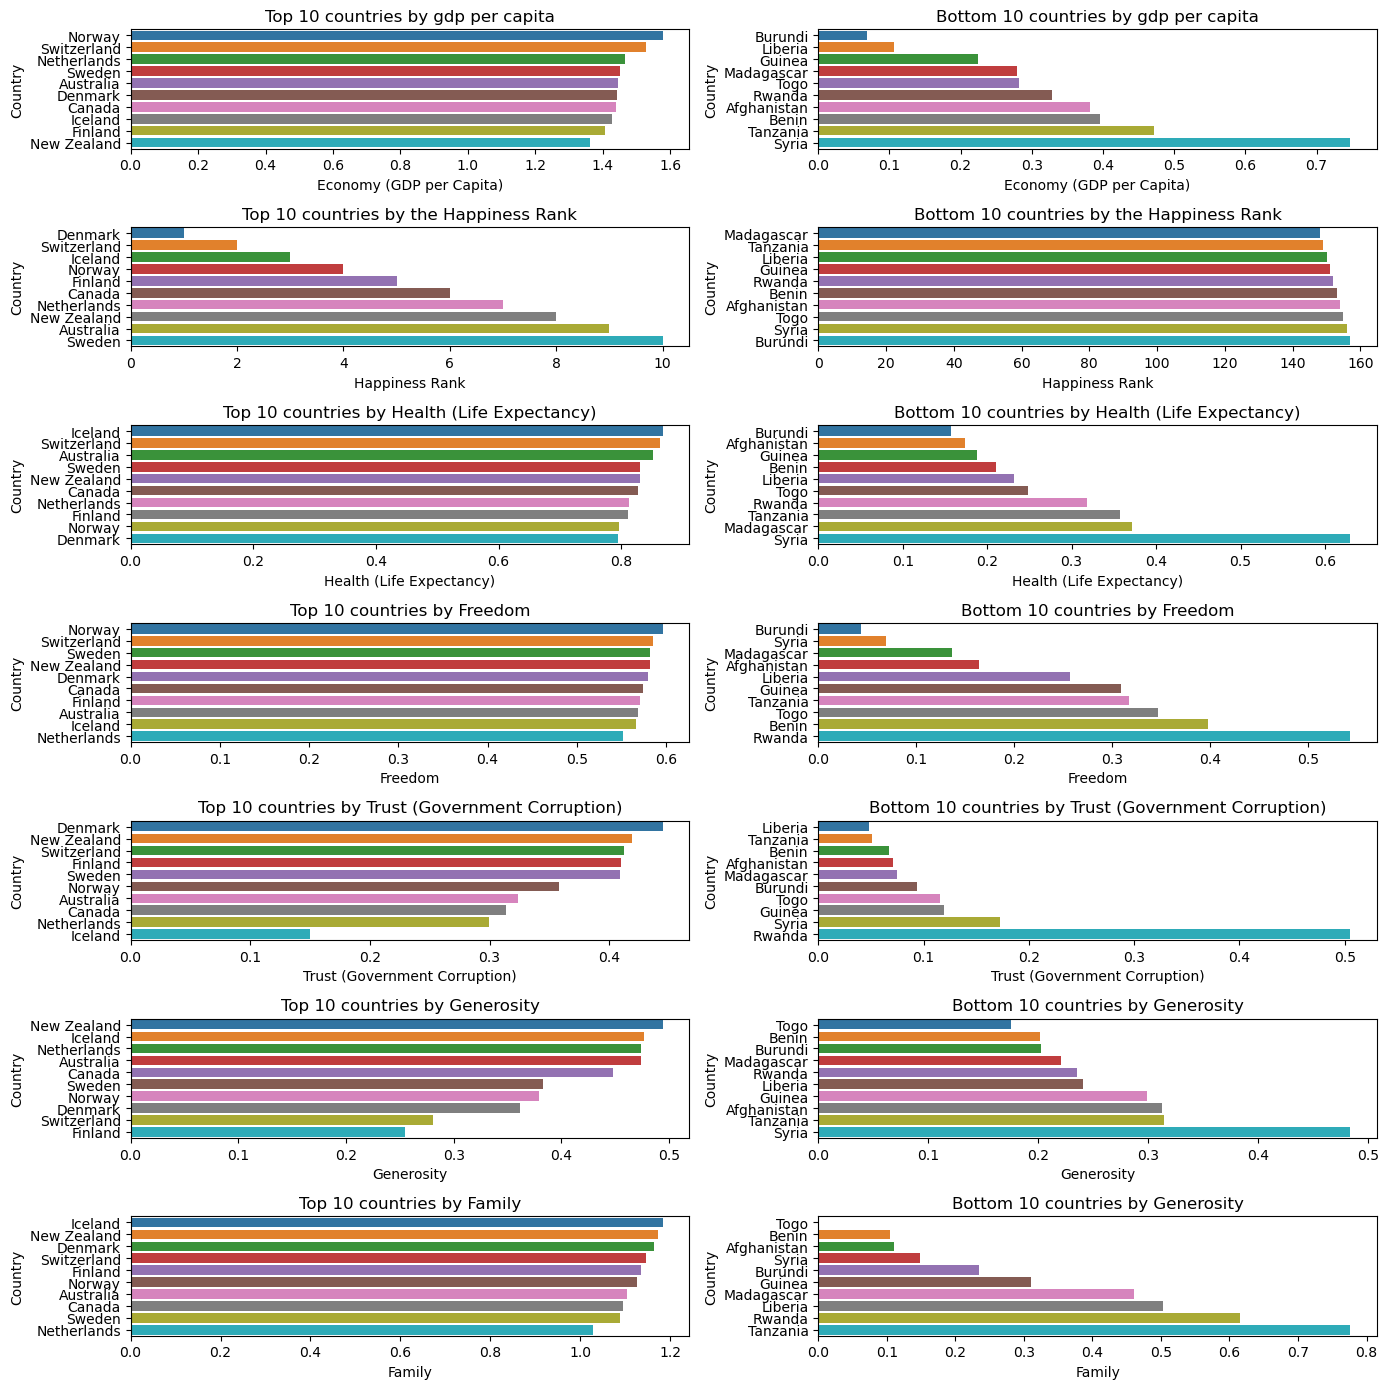

In [16]:
fig, axs = plt.subplots(7, 2, figsize=(14, 14))  # Create a 1x2 grid of subplots

##Top 10
df_10 = df[:10]
df_sorted_econ = df_10.sort_values('Economy (GDP per Capita)', ascending=False)
sns.barplot(data=df_sorted_econ, x='Economy (GDP per Capita)', y='Country', ax=axs[0,0])  # Use the second subplot

axs[0, 0].set_xlabel('Economy (GDP per Capita)')
axs[0, 0].set_ylabel('Country')
axs[0, 0].set_title('Top 10 countries by gdp per capita')

##Bottom 10
df_sorted_econ_bottom = df[-10:].sort_values('Economy (GDP per Capita)', ascending=True)
sns.barplot(data=df_sorted_econ_bottom, x='Economy (GDP per Capita)', y='Country', ax=axs[0,1])  # Use the second subplot
axs[0, 1].set_xlabel('Economy (GDP per Capita)')
axs[0, 1].set_ylabel('Country')
axs[0, 1].set_title('Bottom 10 countries by gdp per capita')

###### Happiness Rank

# Sort the DataFrame by 'Economy (GDP per Capita)''
df_sorted_happiness = df[:10].sort_values('Happiness Rank', ascending=True)
sns.barplot(data=df_sorted_happiness, x='Happiness Rank', y='Country', ax=axs[1,0])  # Use the second subplot

axs[1,0].set_xlabel('Happiness Rank')
axs[1,0].set_ylabel('Country')
axs[1,0].set_title('Top 10 countries by the Happiness Rank')

df_sorted_happiness_bottom = df[-10:].sort_values('Happiness Rank', ascending=True)
sns.barplot(data=df_sorted_happiness_bottom, x='Happiness Rank', y='Country', ax=axs[1,1])  # Use the second subplot
axs[1,1].set_xlabel('Happiness Rank')
axs[1,1].set_ylabel('Country')
axs[1,1].set_title('Bottom 10 countries by the Happiness Rank')

###### Health (Life Expectancy)

df_sorted_health = df[:10].sort_values('Health (Life Expectancy)', ascending=False)
sns.barplot(data=df_sorted_health, x='Health (Life Expectancy)', y='Country', ax=axs[2,0])  # Use the second subplot

axs[2,0].set_xlabel('Health (Life Expectancy)')
axs[2,0].set_ylabel('Country')
axs[2,0].set_title('Top 10 countries by Health (Life Expectancy)')

df_sorted_health_bottom = df[-10:].sort_values('Health (Life Expectancy)', ascending=True)
sns.barplot(data=df_sorted_health_bottom, x='Health (Life Expectancy)', y='Country', ax=axs[2,1])  # Use the second subplot
axs[2,1].set_xlabel('Health (Life Expectancy)')
axs[2,1].set_ylabel('Country')
axs[2,1].set_title('Bottom 10 countries by Health (Life Expectancy)')

###### 

df_sorted_freedom = df[:10].sort_values('Freedom', ascending=False)
sns.barplot(data=df_sorted_freedom, x='Freedom', y='Country', ax=axs[3,0])  # Use the second subplot

axs[3,0].set_xlabel('Freedom')
axs[3,0].set_ylabel('Country')
axs[3,0].set_title('Top 10 countries by Freedom')

df_sorted_freedom_bottom = df[-10:].sort_values('Freedom', ascending=True)
sns.barplot(data=df_sorted_freedom_bottom, x='Freedom', y='Country', ax=axs[3,1])  # Use the second subplot
axs[3,1].set_xlabel('Freedom')
axs[3,1].set_ylabel('Country')
axs[3,1].set_title('Bottom 10 countries by Freedom')

###### Trust (Government Corruption)

df_sorted_trust = df[:10].sort_values('Trust (Government Corruption)', ascending=False)
sns.barplot(data=df_sorted_trust, x='Trust (Government Corruption)', y='Country', ax=axs[4,0])  # Use the second subplot

axs[4,0].set_xlabel('Trust (Government Corruption)')
axs[4,0].set_ylabel('Country')
axs[4,0].set_title('Top 10 countries by Trust (Government Corruption)')

df_sorted_trust_bottom = df[-10:].sort_values('Trust (Government Corruption)', ascending=True)
sns.barplot(data=df_sorted_trust_bottom, x='Trust (Government Corruption)', y='Country', ax=axs[4,1])  # Use the second subplot
axs[4,1].set_xlabel('Trust (Government Corruption)')
axs[4,1].set_ylabel('Country')
axs[4,1].set_title('Bottom 10 countries by Trust (Government Corruption)')


###### Generosity

df_sorted_Generosity = df[:10].sort_values('Generosity', ascending=False)
sns.barplot(data=df_sorted_Generosity, x='Generosity', y='Country', ax=axs[5,0])  # Use the second subplot

axs[5,0].set_xlabel('Generosity')
axs[5,0].set_ylabel('Country')
axs[5,0].set_title('Top 10 countries by Generosity')

df_sorted_Generosity_bottom = df[-10:].sort_values('Generosity', ascending=True)
sns.barplot(data=df_sorted_Generosity_bottom, x='Generosity', y='Country', ax=axs[5,1])  # Use the second subplot
axs[5,1].set_xlabel('Generosity')
axs[5,1].set_ylabel('Country')
axs[5,1].set_title('Bottom 10 countries by Generosity')

###### Family

df_sorted_Family = df[:10].sort_values('Family', ascending=False)
sns.barplot(data=df_sorted_Family, x='Family', y='Country', ax=axs[6,0])  # Use the second subplot

axs[6,0].set_xlabel('Family')
axs[6,0].set_ylabel('Country')
axs[6,0].set_title('Top 10 countries by Family')

df_sorted_Family_bottom = df[-10:].sort_values('Family', ascending=True)
sns.barplot(data=df_sorted_Family_bottom, x='Family', y='Country', ax=axs[6,1])  # Use the second subplot
axs[6,1].set_xlabel('Family')
axs[6,1].set_ylabel('Country')
axs[6,1].set_title('Bottom 10 countries by Generosity')


# Adjust the layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">Correlations</div>

/tmp/ipykernel_20/4080544712.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



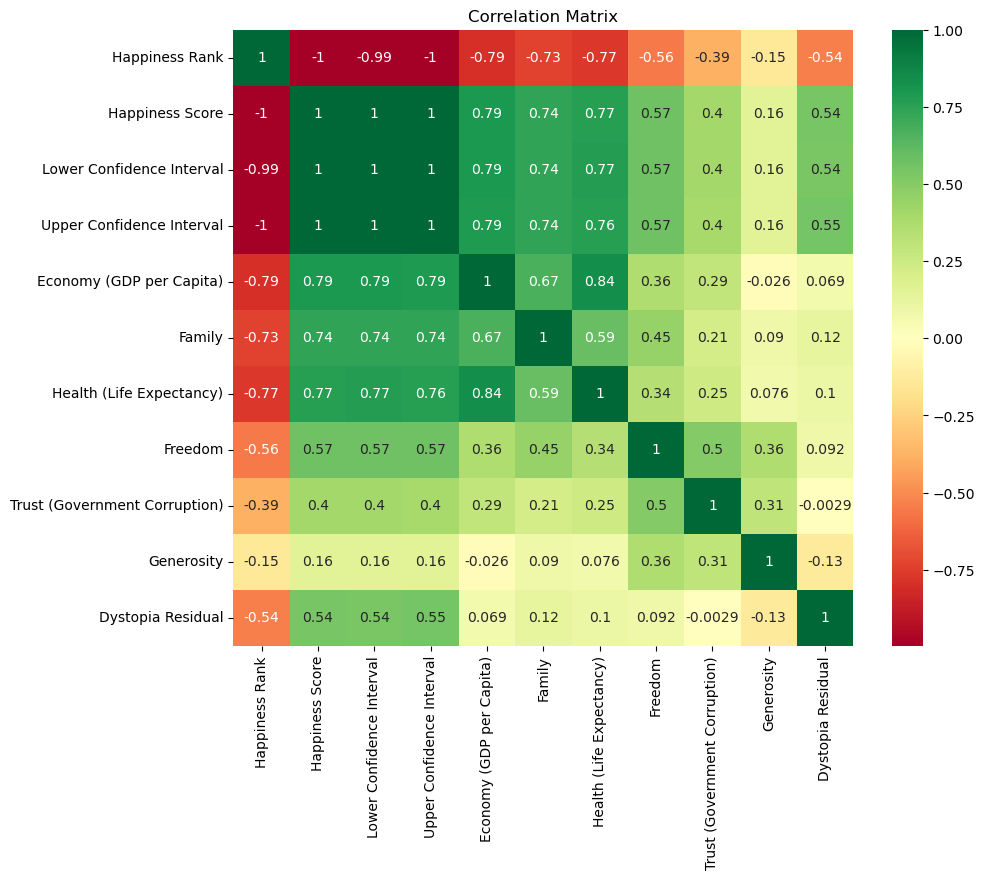

In [17]:


correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Matrix")
plt.show()



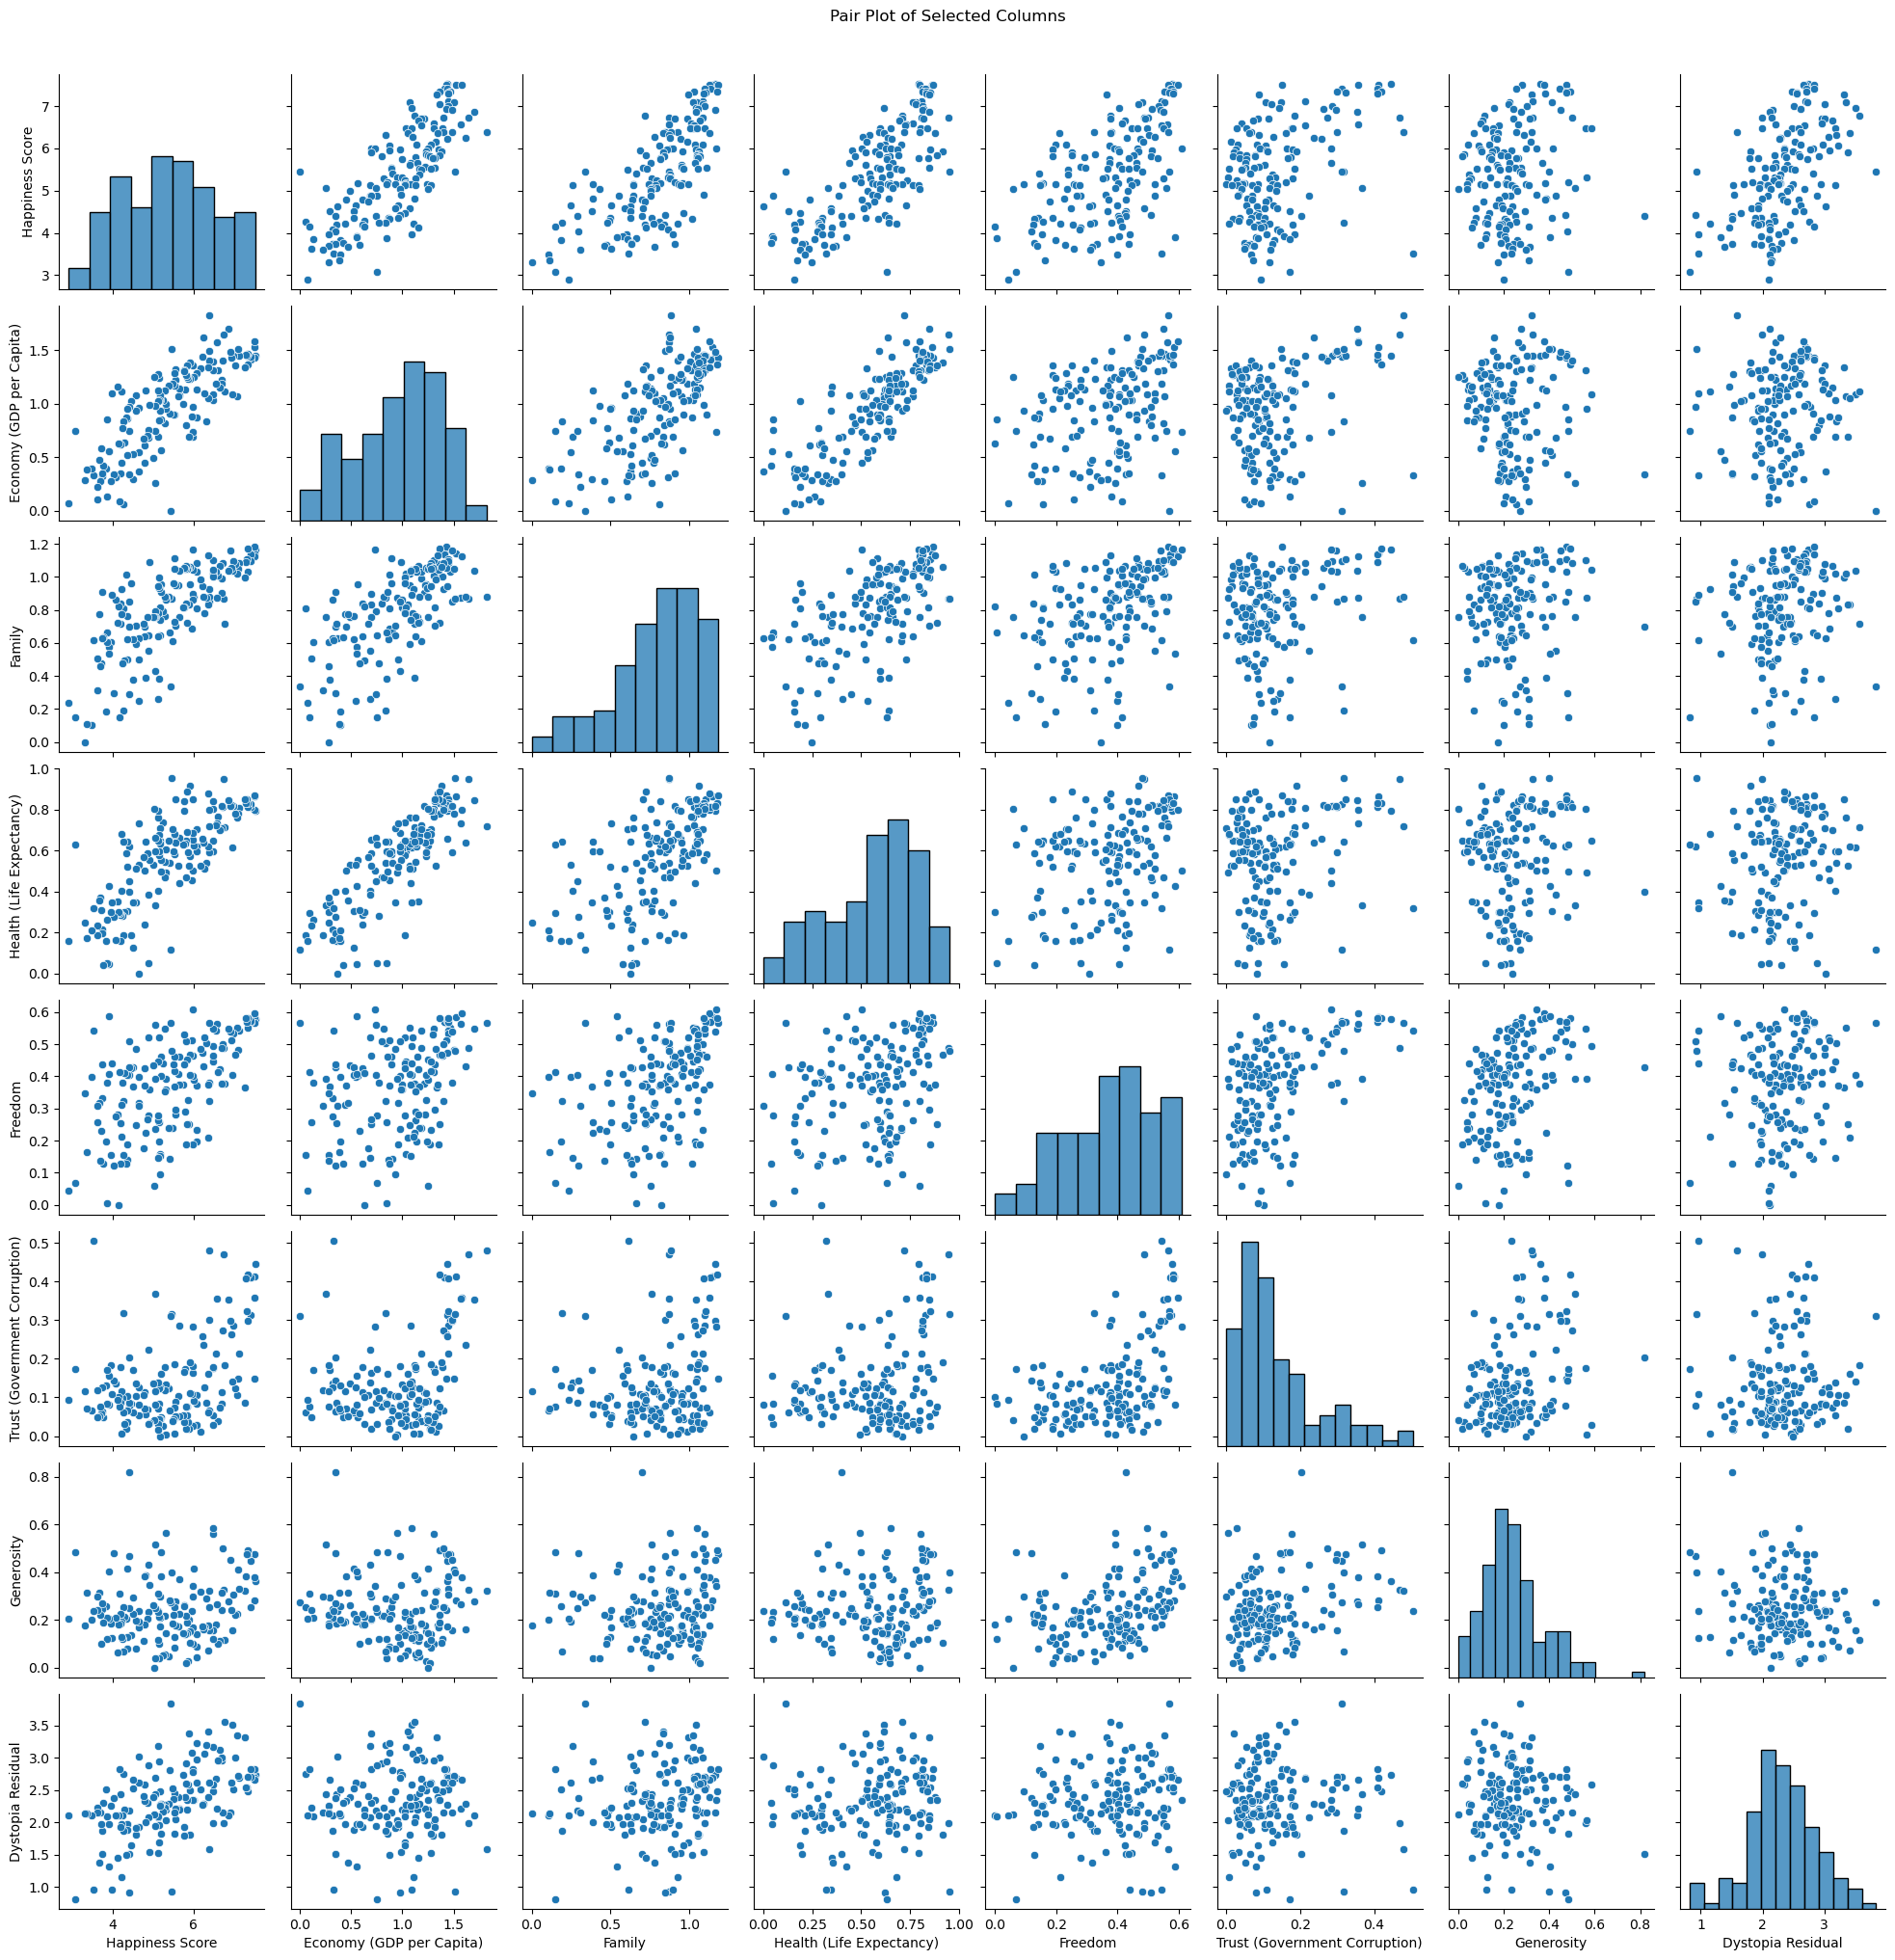

In [18]:
columns = ["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom",
           "Trust (Government Corruption)", "Generosity", "Dystopia Residual"]

sns.pairplot(df[columns])
plt.suptitle("Pair Plot of Selected Columns", y=1.02)
plt.show()

### >0.7 coefficient indicates a strong correlation
### 0.3-0.7 indicates a moderate correlation
### >0.3 indicates a weak correlation

### As we can see such variables as GDP per capita, Health and Happiness Score are strongly correlated between each other (>0.7)
### Variables such as Generosity and Trust are weakly correlated (>0.3)
### And variables such as happiness score and generosity show no significant correlation

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">Summary</div>

# As we can see there are certain trends in this dataset, for example:

### Oceanic, Scandinavian and low countries tend to score the highest on the various metrics presented in this dataset
### Certain variables such as GDP and Health are correlated as having more money means that you afford better healthcare, etc.
### GDP has a relationship with the happiness score, more money more security
### Negative correlation between corruption and happiness, people are less happy in countries with more corruption
